In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [95]:
# Define the stock symbol
ticker_symbol = 'NVDA'
index_symbol = 'SPY'

# Fetch daily data for 'TSLA' from Yahoo Finance
data = yf.download(ticker_symbol)
index_data = yf.download(index_symbol, start = '1999-01-22')

# Display the fetched data
print(data.head())
print(index_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1999-01-22  0.437500  0.488281  0.388021  0.410156   0.376319  271468800
1999-01-25  0.442708  0.458333  0.410156  0.453125   0.415743   51048000
1999-01-26  0.458333  0.467448  0.411458  0.417969   0.383487   34320000
1999-01-27  0.419271  0.429688  0.395833  0.416667   0.382293   24436800
1999-01-28  0.416667  0.419271  0.412760  0.415365   0.381098   22752000
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
1999-01-22  122.12500  123.84375  121.78125  122.56250  78.868286  7522300
1999-01-25  123.28125  124.00000  121.90625  123.81250  79.672607  5700300
1999-01-26  124.12500  126.06250  123.62500  126.06

In [96]:
#inspect data - it is already in datetimeindex format! great. We can focus on Adj close and Date
print(data.info())
print(index_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6177 entries, 1999-01-22 to 2023-08-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6177 non-null   float64
 1   High       6177 non-null   float64
 2   Low        6177 non-null   float64
 3   Close      6177 non-null   float64
 4   Adj Close  6177 non-null   float64
 5   Volume     6177 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 337.8 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6177 entries, 1999-01-22 to 2023-08-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6177 non-null   float64
 1   High       6177 non-null   float64
 2   Low        6177 non-null   float64
 3   Close      6177 non-null   float64
 4   Adj Close  6177 non-null   float64
 5   Volume     6177 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 337.8 KB
Non

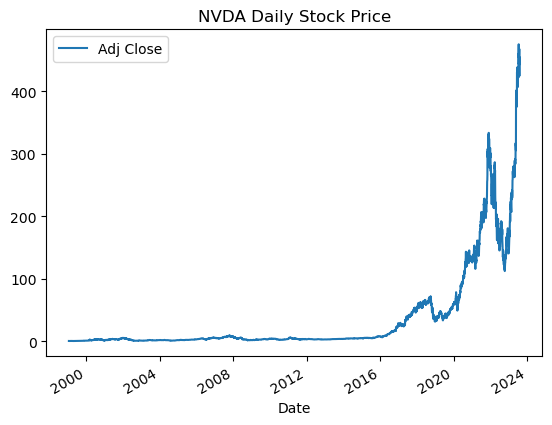

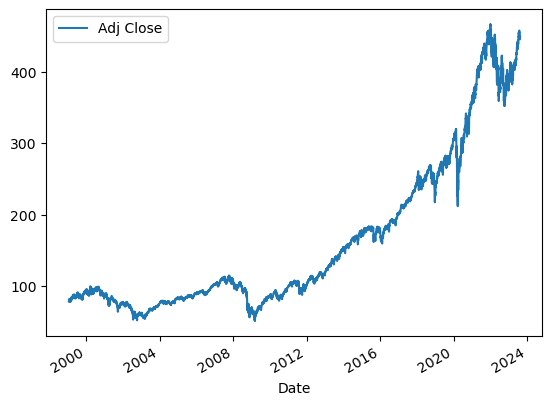

In [97]:
df = data[['Adj Close']]
index_df = index_data[['Adj Close']]
df.plot(title = str(ticker_symbol) + ' Daily Stock Price')
index_df.plot()
plt.show()

#We have a time series here. Lets perform some analysis on it.

In [51]:
from statsmodels.tsa.stattools import adfuller, kpss

# Perform Augmented Dickey-Fuller (ADF) test
result = adfuller(df, autolag='AIC')

# Print the ADF test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])



ADF Statistic: 2.407017317255168
p-value: 0.999013573831928
Critical Values: {'1%': -3.4314149576177835, '5%': -2.862010615383498, '10%': -2.567020505822633}


C:\Users\jimmy\AppData\Local\Temp\ipykernel_10664\625822389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log Returns'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
C:\Users\jimmy\AppData\Local\Temp\ipykernel_10664\625822389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_df['Log Returns'] = np.log(index_df['Adj Close'] / index_df['Adj Close'].shift(1))
C:\Users\jimmy\AppData\Local\Temp\ipykernel_10664\625822389.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy

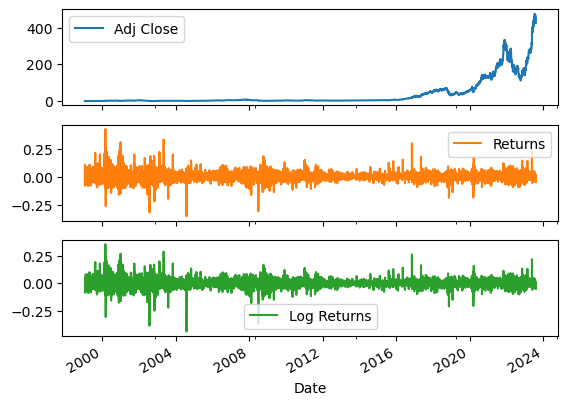

In [100]:
# Calculate Daily log returns
df['Log Returns'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
# Calculate log returns
index_df['Log Returns'] = np.log(index_df['Adj Close'] / index_df['Adj Close'].shift(1))

# Drop missing values
df.dropna(subset=['Returns'], inplace=True)
index_df.dropna(subset=['Log Returns'], inplace=True)

df.plot(subplots=True)
plt.show()


In [99]:
print(df.describe())
print(index_df.describe())

         Adj Close      Returns  Log Returns
count  6176.000000  6176.000000  6176.000000
mean     35.311758     0.001861     0.001138
std      71.842203     0.038147     0.037984
min       0.313002    -0.352335    -0.434382
25%       2.470515    -0.016291    -0.016425
50%       4.034712     0.001087     0.001087
75%      34.460118     0.018050     0.017889
max     474.940002     0.424145     0.353572
         Adj Close  Log Returns
count  6176.000000  6176.000000
mean    162.892896     0.000280
std     108.557398     0.012387
min      51.568031    -0.115887
25%      85.071041    -0.004929
50%     106.303188     0.000654
75%     218.557594     0.006130
max     466.563293     0.135577


In [105]:
#Correlation of stock return vs index
# Combine the two return series into a single DataFrame
combined_returns = pd.concat([df['Log Returns'], index_df['Log Returns']], axis=1)

# Calculate correlation matrix
correlation_matrix = combined_returns.corr()
print(correlation_matrix.iloc[1,0])

0.5234751402559475


In [107]:
#Calculate Total returns
total_return_stock = df['Adj Close'].iloc[-1]/(df['Adj Close'].iloc[0])*100
total_return_index = index_df['Adj Close'].iloc[-1]/(index_df['Adj Close'].iloc[0])*100

print(total_return_stock, total_return_index)

102356.54427611727 549.4910430900956


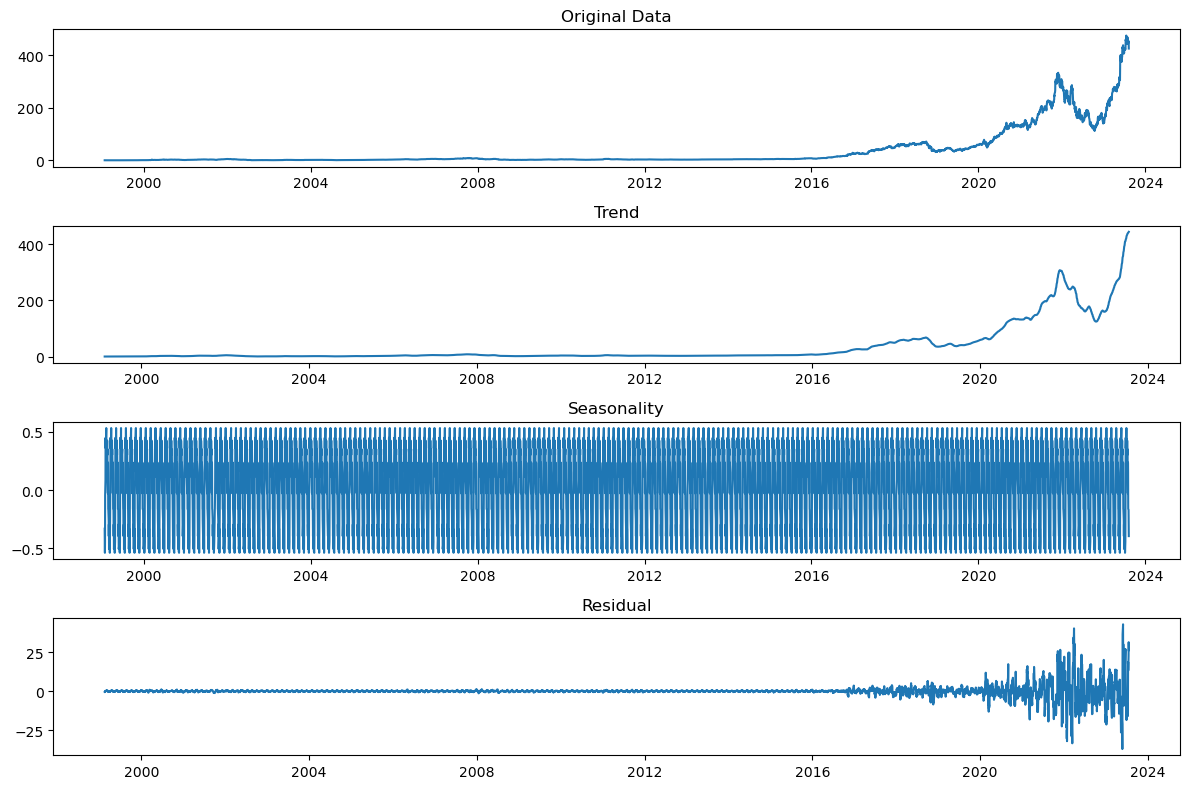

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have the DataFrame 'df' with 'Adj Close' column

# Perform seasonal decomposition
result = seasonal_decompose(df['Adj Close'], model='additive', period=30)  # Adjust period as needed

# Plot the original data, trend, seasonality, and residual
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Adj Close'])
plt.title('Original Data')

plt.subplot(4, 1, 2)
plt.plot(df.index, result.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(df.index, result.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(df.index, result.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()


In [81]:
# Perform Augmented Dickey-Fuller (ADF) test
result = adfuller(df['Log Returns'], autolag='AIC')

# Print the ADF test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

#With a P value < 0.05 and negative ADF, we can reject the null hypothesis that Returns is non-stationary

ADF Statistic: -15.378515701623284
p-value: 3.4324874457219545e-28
Critical Values: {'1%': -3.4314137449643978, '5%': -2.8620100795957586, '10%': -2.5670202206094257}


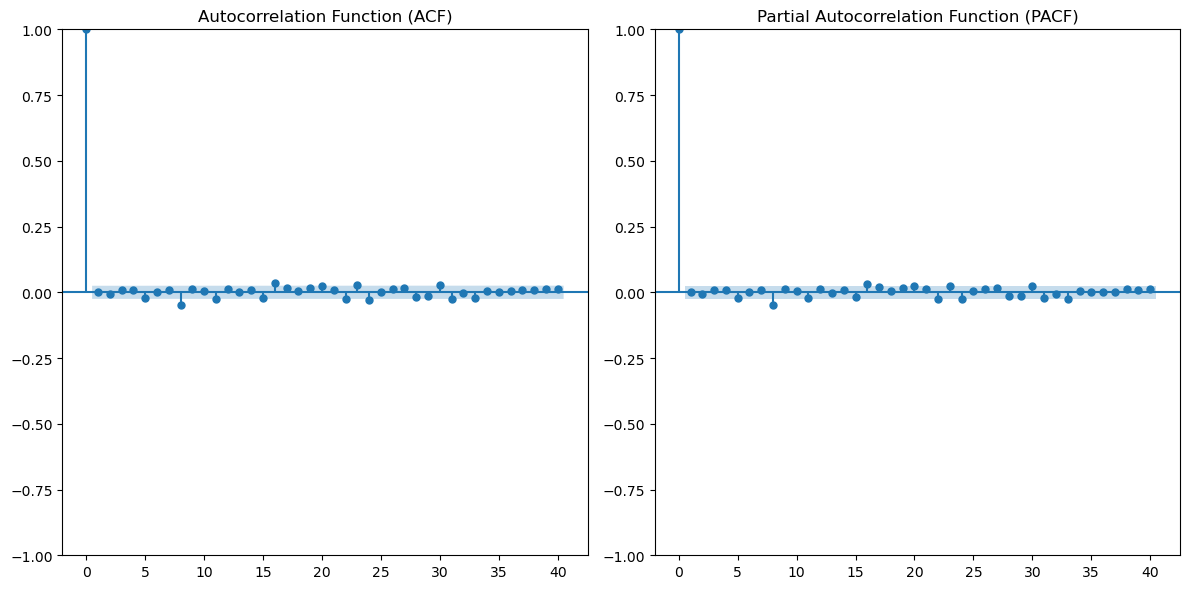

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Let's look at ACF and PACF

# Plot the ACF and PACF
plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(df['Log Returns'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(df['Log Returns'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#The ACF and PACF plots show no significant lags

In [87]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split data into train and test sets
train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing
train, test = df['Log Returns'][:train_size], df['Log Returns'][train_size:]

# Define ranges for p, d, and q values
p_values = range(0, 3)  # Adjust range as needed
d_values = range(0, 3)  # Adjust range as needed
q_values = range(0, 3)  # Adjust range as needed

best_mse = float('inf')
best_order = None

# Loop through different parameter combinations
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                model = ARIMA(train, order=order)
                model_fit = model.fit()
                forecast_steps = len(test)
                forecast = model_fit.forecast(steps=forecast_steps)
                mse = mean_squared_error(test, forecast)
                if mse < best_mse:
                    best_mse = mse
                    best_order = order
            except:
                continue

print('Best ARIMA Order:', best_order)
print('Best MSE:', best_mse)

#Best model is (2,1,1)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_m

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels

Best ARIMA Order: (2, 1, 1)
Best MSE: 0.0011607929693881627


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836:

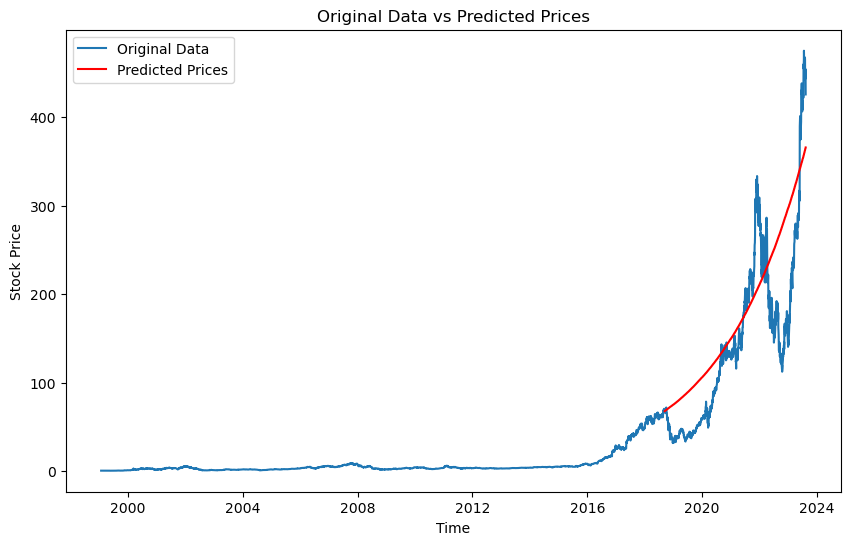

In [88]:

# Split data into train and test sets
train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing
train, test = df['Log Returns'][:train_size], df['Log Returns'][train_size:]

# Fit the best ARIMA model to the training data
best_order = (2, 1, 1)  # Replace with the best order you found
model = ARIMA(train, order=best_order)
model_fit = model.fit()

# Forecast future returns using the fitted model
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# Convert returns to predicted stock prices using cumulative sum
predicted_prices = df['Adj Close'][train_size - 1] * (1 + forecast).cumprod()

# Plot original data and predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'], label='Original Data')
plt.plot(test.index, predicted_prices, color='red', label='Predicted Prices')
plt.title('Original Data vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [89]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Log Returns   No. Observations:                 4939
Model:                 ARIMA(2, 1, 1)   Log Likelihood                9026.987
Date:                Wed, 09 Aug 2023   AIC                         -18045.975
Time:                        16:24:44   BIC                         -18019.956
Sample:                             0   HQIC                        -18036.850
                               - 4939                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0165      0.009      1.779      0.075      -0.002       0.035
ar.L2         -0.0141      0.009     -1.622      0.105      -0.031       0.003
ma.L1         -1.0000      0.024    -42.050      0.000      -1.047      -0.953
sigma2         0.0015   3.53e-05     42.730      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36262.31
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
'''
In this exercise, we performed some basic time series analysis of Nvidia stock and S&P500 returns.

I am looking to answer a few questions:
1) Does the stock outperform S&P500 in the past?
2) Are there any obvious trends in the stock price?
3) Is there any correlation between the two time series?
4) Can i find a time series model to predict the stock price?

Based on the above jupyter notebook, here are the conclusions:
1) NVDA has outperformed S&P500 significantly in the past! NVDA stock price went up 102356.54! whereas
S&P500 index increased by 549.49%

2) The stock price of NVDA has an obvious increasing trend, as seen in the plot of the closing prices and looking at the ADF test results
We need to look at the daily log returns of the stock instead, we managed to see that the log returns is a stationary series.

3) The correlation of log returns between both time series is 0.52, not too strong but positive.

4) I then tried to look for the best ARIMA model to fit the log return time series and our results show ARIMA (2,1,1) produces the smallest MSE
Data is split between training and testing and we fit the model on training data to predict the stock price over test period. s

'''